# Sales Analysis

## 1) Data Wrangling 

In [44]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data=pd.read_csv('AusApparalSales4thQrt2020.csv')
data.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [46]:
data.shape

(7560, 6)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [48]:
data.describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


In [49]:
data.isna().sum()

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

##### There are no missing values in the data

In [50]:
#checking for the unique values
data['Time'].unique()

array([' Morning', ' Afternoon', ' Evening'], dtype=object)

In [51]:
data['State'].unique()

array([' WA', ' NT', ' SA', ' VIC', ' QLD', ' NSW', ' TAS'], dtype=object)

In [52]:
data['Group'].unique()

array([' Kids', ' Men', ' Women', ' Seniors'], dtype=object)

## 2. Data Analysis


#### a. Standardizing the data (Since standardization maintains zero mean and unit variance, it was preferred over normalization for this dataset.)

In [53]:
df=data.copy()

In [54]:
df['Sales']=(df['Sales']-df['Sales'].mean())/df['Sales'].std()
df['Unit']=(df['Unit']-df['Unit'].mean())/df['Unit'].std()

In [55]:
df

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,-0.775530,-0.775530
1,1-Oct-2020,Morning,WA,Men,-0.775530,-0.775530
2,1-Oct-2020,Morning,WA,Women,-1.085574,-1.085574
3,1-Oct-2020,Morning,WA,Seniors,-0.232953,-0.232953
4,1-Oct-2020,Afternoon,WA,Kids,-1.163085,-1.163085
...,...,...,...,...,...,...
7555,30-Dec-2020,Afternoon,TAS,Seniors,-0.310464,-0.310464
7556,30-Dec-2020,Evening,TAS,Kids,-0.232953,-0.232953
7557,30-Dec-2020,Evening,TAS,Men,-0.232953,-0.232953
7558,30-Dec-2020,Evening,TAS,Women,-0.542997,-0.542997


#### Descriptive Statistics (Mean, Median, Mode, Standard deviation) of the data

In [56]:
mean_sales = df['Sales'].mean()
median_sales = df['Sales'].median()
mode_sales = df['Sales'].mode()[0]
std_sales = df['Sales'].std()

print(f"Mean Sales: {mean_sales}")
print(f"Median Sales: {median_sales}")
print(f"Mode Sales: {mode_sales}")
print(f"Standard Deviation of Sales: {std_sales}")


Mean Sales: 3.007588299513652e-17
Median Sales: -0.3104641680811532
Mode Sales: -0.6980189236528843
Standard Deviation of Sales: 1.0000000000000064


#### Identifying the group with highest and lowest sales based on the data

In [57]:
data.groupby(['State','Group']).sum('Sales')

Unit     Sales
State Group                   
NSW   Kids      7435  18587500
      Men       7609  19022500
      Seniors   7275  18187500
      Women     7669  19172500
NT    Kids      2280   5700000
      Men       2305   5762500
      Seniors   2186   5465000
      Women     2261   5652500
QLD   Kids      3404   8510000
      Men       3357   8392500
      Seniors   3276   8190000
      Women     3330   8325000
SA    Kids      5806  14515000
      Men       5862  14655000
      Seniors   5887  14717500
      Women     5988  14970000
TAS   Kids      2310   5775000
      Men       2303   5757500
      Seniors   2260   5650000
      Women     2231   5577500
VIC   Kids     10544  26360000
      Men      10563  26407500
      Seniors  10526  26315000
      Women    10593  26482500
WA    Kids      2250   5625000
      Men       2301   5752500
      Seniors   2205   5512500
      Women     2105   5262500

In [58]:
data.groupby(['State']).sum('Sales')

,Unit,Sales
State,,
NSW,29988,74970000
NT,9032,22580000
QLD,13367,33417500
SA,23543,58857500
TAS,9104,22760000
VIC,42226,105565000
WA,8861,22152500


In [59]:
#highest and lowest sales State
highest_sales_state=data.groupby(['State']).sum('Sales').idxmax()
lowest_sales_state=data.groupby(['State']).sum('Sales').idxmin()

In [60]:
highest_sales_state

Unit      VIC
Sales     VIC
dtype: object

In [61]:
lowest_sales_state

Unit      WA
Sales     WA
dtype: object

In [62]:
#highest and lowest sales group
highest_sales_group=data.groupby(['Group']).sum('Sales').idxmax()
lowest_sales_group=data.groupby(['Group']).sum('Sales').idxmin()

In [63]:
highest_sales_group

Unit      Men
Sales     Men
dtype: object

In [64]:
lowest_sales_group

Unit      Seniors
Sales     Seniors
dtype: object

In [65]:
data.dtypes

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

In [66]:
data['Date']=pd.to_datetime(data['Date'])

In [67]:
data.dtypes

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

In [68]:
data['Date']

0      2020-10-01
1      2020-10-01
2      2020-10-01
3      2020-10-01
4      2020-10-01
          ...    
7555   2020-12-30
7556   2020-12-30
7557   2020-12-30
7558   2020-12-30
7559   2020-12-30
Name: Date, Length: 7560, dtype: datetime64[ns]

In [69]:
weakly_sales=data.resample('W',on='Date')['Sales'].sum()

In [70]:
weakly_sales

Date
2020-10-04    15045000
2020-10-11    27002500
2020-10-18    26640000
2020-10-25    26815000
2020-11-01    21807500
2020-11-08    20865000
2020-11-15    21172500
2020-11-22    21112500
2020-11-29    21477500
2020-12-06    29622500
2020-12-13    31525000
2020-12-20    31655000
2020-12-27    31770000
2021-01-03    13792500
Freq: W-SUN, Name: Sales, dtype: int64

In [71]:
monthly_sales=data.resample('ME',on='Date')['Sales'].sum()
monthly_sales

Date
2020-10-31    114290000
2020-11-30     90682500
2020-12-31    135330000
Freq: ME, Name: Sales, dtype: int64

In [72]:
Quarterly_sales=data.resample('QE',on='Date')['Sales'].sum()
Quarterly_sales

Date
2020-12-31    340302500
Freq: QE-DEC, Name: Sales, dtype: int64

# Data Visualization

### Box Plot for Descriptive Statistics

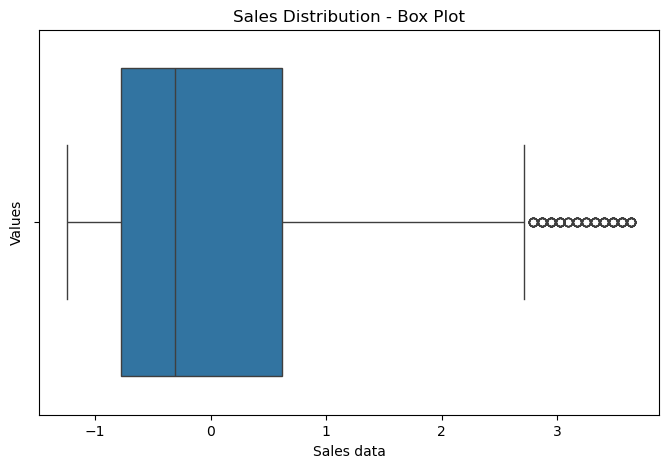

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Sales"])
plt.title("Sales Distribution - Box Plot")
plt.xlabel("Sales data")
plt.ylabel("Values")
plt.show()

### State-wise analysis for different demographic groups(kids,men,women,senior)

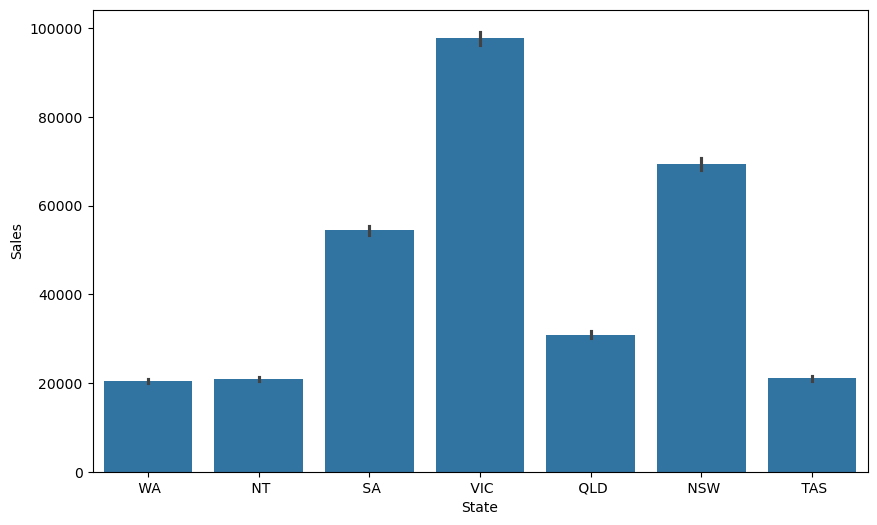

In [74]:
plt.figure(figsize=(10,6))

sns.barplot(x=data['State'],y=data['Sales'])

plt.show()

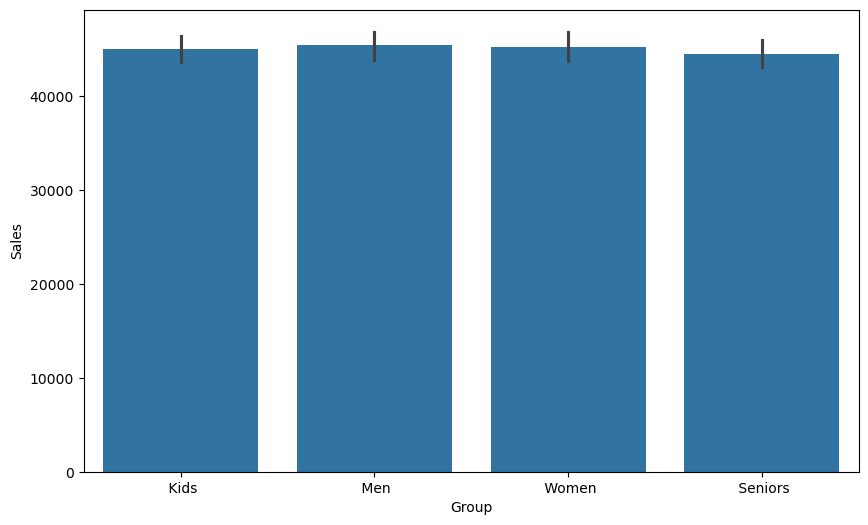

In [75]:
plt.figure(figsize=(10,6))

sns.barplot(x=data['Group'],y=data['Sales'])

plt.show()

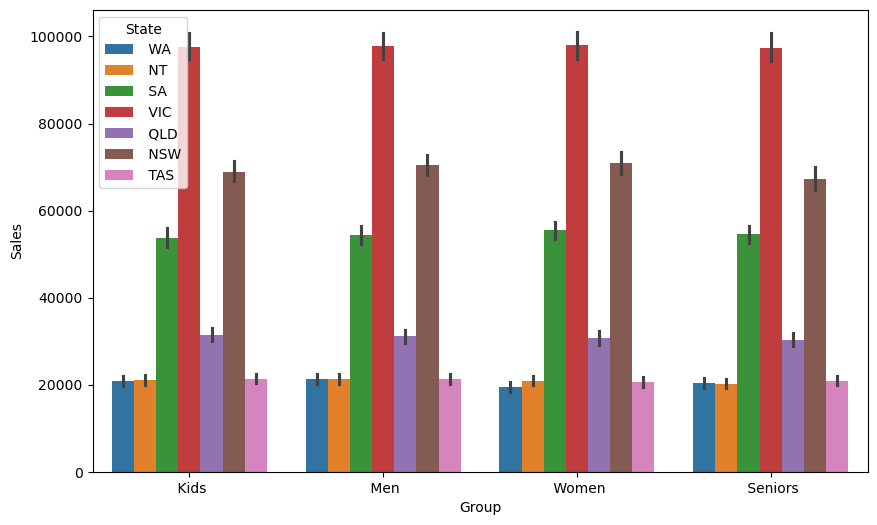

In [76]:
plt.figure(figsize=(10,6))

sns.barplot(x=data['Group'],y=data['Sales'],hue='State',data=data)

plt.show()

## Time of the day analysis 

In [77]:
data

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


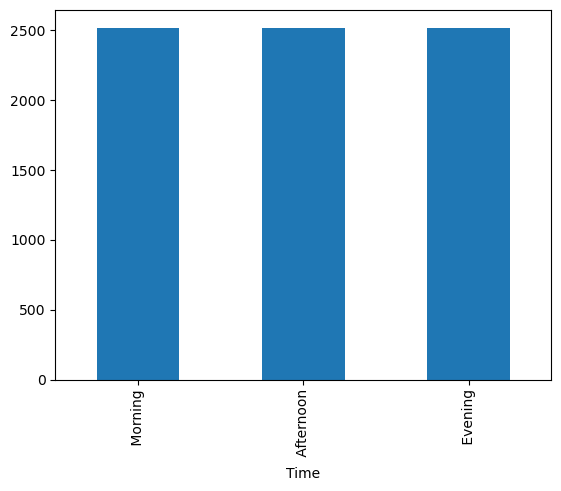

In [78]:
data['Time'].value_counts().plot(kind='bar')
plt.show()

## Time vs sales analysis

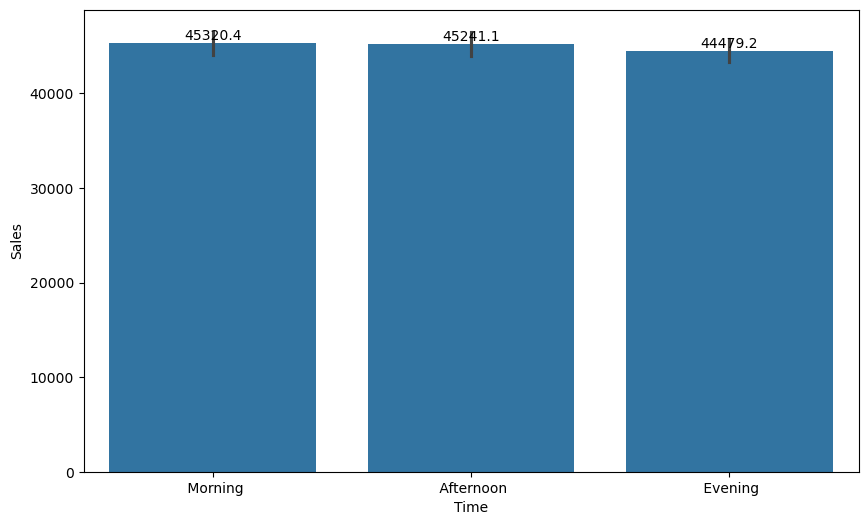

In [79]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x=data['Time'],y=data['Sales'])
for label in ax.containers:
    ax.bar_label(label)
plt.show()

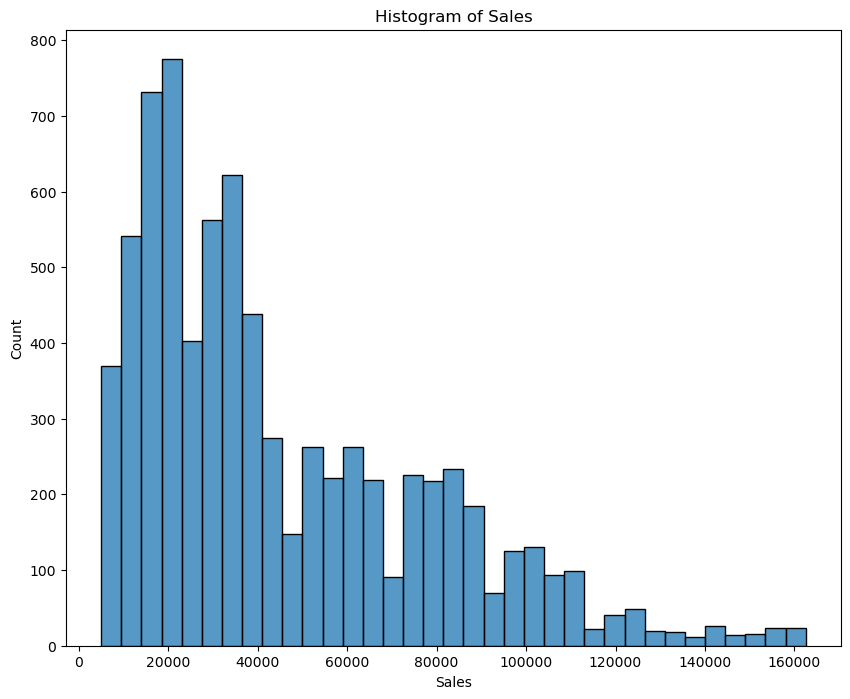

In [80]:
plt.figure(figsize=(10,8))

sns.histplot(x=data['Sales'])

plt.title('Histogram of Sales')

plt.show()



C:\Users\Tanish\AppData\Local\Temp\ipykernel_19552\3690838909.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data['Sales'])


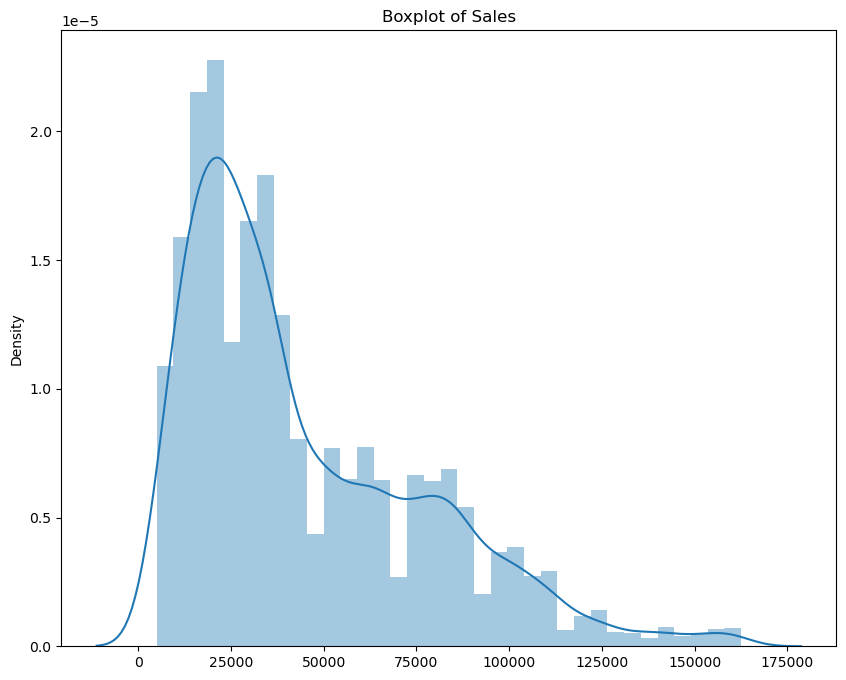

In [81]:
plt.figure(figsize=(10,8))
sns.distplot(x=data['Sales'])
plt.title('Boxplot of Sales')
plt.show()

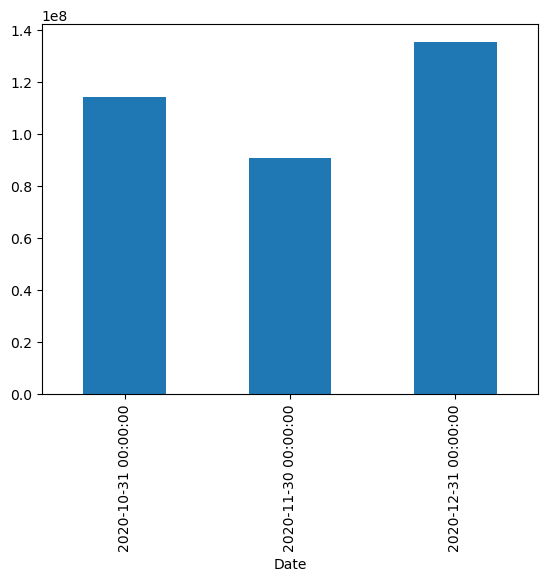

In [82]:
data.resample('ME',on='Date')['Sales'].sum().plot(kind='bar')

plt.show()